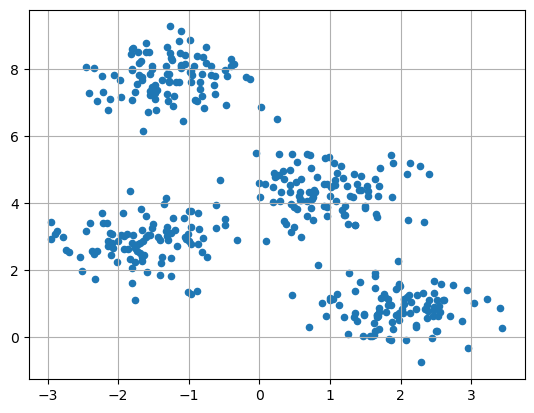

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.6, random_state = 0)
plt.scatter(x[:, 0], x[:, 1], s = 20)
plt.grid()
plt.show()

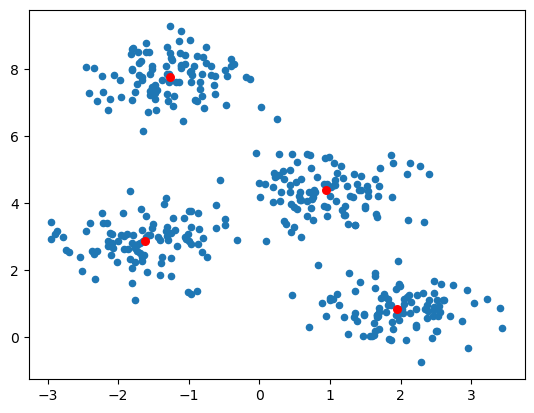

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_means = kmeans.predict(x)
centers = kmeans.cluster_centers_
plt.scatter(x[:, 0], x[:, 1], s = 20)
plt.scatter(centers[:, 0], centers[:, 1], s = 30, c = 'red')
plt.show()

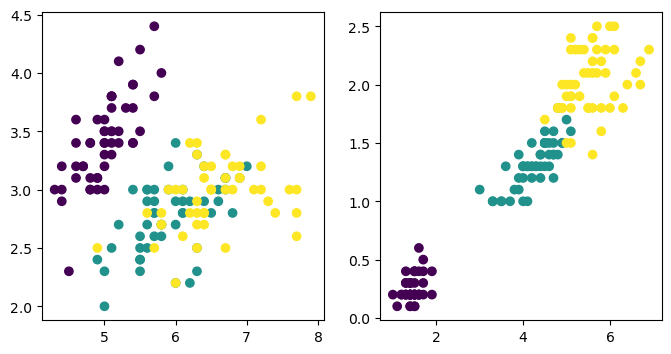

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [71]:
from sklearn.datasets import load_iris
from pandas import DataFrame

iris = load_iris()
df = DataFrame(iris.data)
df[4] = iris.target
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(df[0], df[1], c = df[4])
axs[1].scatter(df[2], df[3], c = df[4])
plt.show()
df

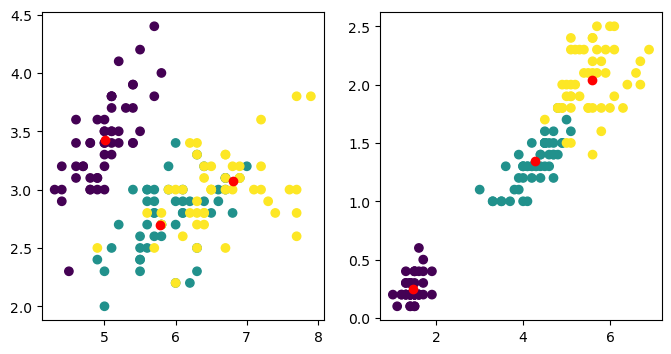

In [72]:
kmeans_iris1 = KMeans(n_clusters = 3)
kmeans_iris1.fit(df[[0, 1]])
y_means = kmeans_iris1.predict(df[[0, 1]])
centers = kmeans_iris1.cluster_centers_

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(df[0], df[1], c = df[4])
axs[0].scatter(centers[:, 0], centers[:, 1], c = 'r')

kmeans_iris2 = KMeans(n_clusters = 3)
kmeans_iris2.fit(df[[2, 3]])
y_means = kmeans_iris2.predict(df[[0, 1]])
centers = kmeans_iris2.cluster_centers_

axs[1].scatter(df[2], df[3], c = df[4])
axs[1].scatter(centers[:, 0], centers[:, 1], c = 'r')

plt.show()

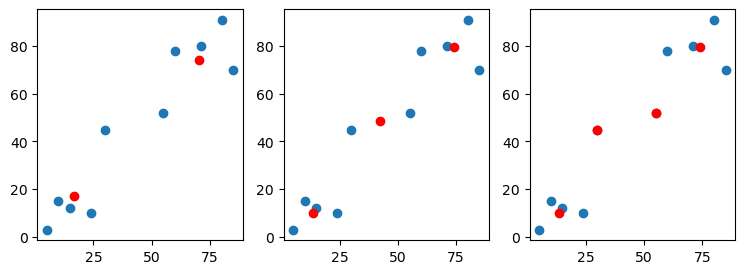

In [73]:
from numpy import array

x = array([[5, 3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91]])

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

for i in range(2, 5):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    y_means = kmeans.predict(x)
    centers = kmeans.cluster_centers_

    axs[i - 2].scatter(x[:, 0], x[:, 1])
    axs[i - 2].scatter(centers[:, 0], centers[:, 1], c = 'r')

plt.show()

In [74]:
iris = load_iris()
df = DataFrame(iris.data)
df[4] = iris.target
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


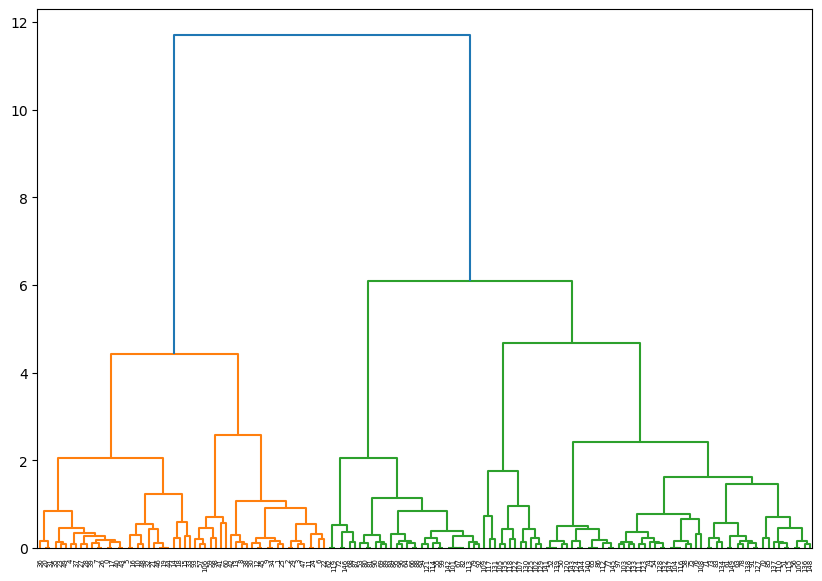

In [75]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))
dend = shc.dendrogram(shc.linkage(df[[0, 1]], method = "ward"))

In [76]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster.fit_predict(df[[2, 3]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

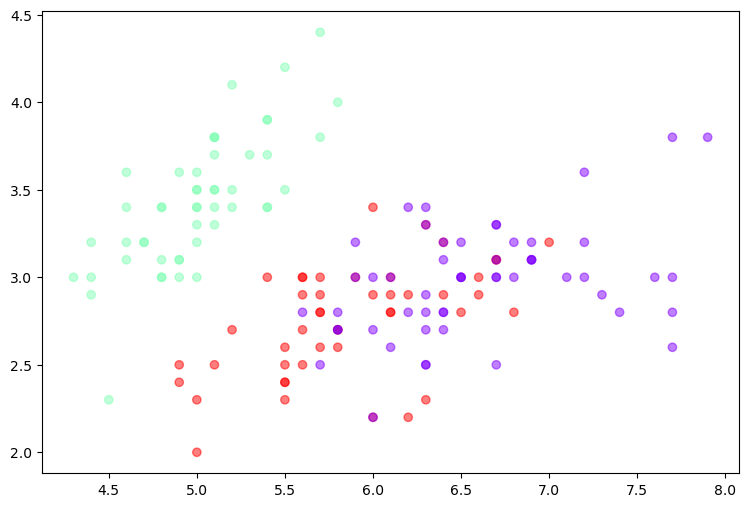

In [78]:
plt.figure(figsize = (9, 6))
plt.scatter(df[0], df[1], c = cluster.labels_, cmap = "rainbow", alpha = 0.5)
plt.show()